In [1]:
import numpy as np
import pandas as pd

_seed = 20200218
np.random.seed(_seed)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='paper', style='whitegrid', rc={'figure.figsize':(21/2, 9/2), 'figure.dpi': 120})
color_palette = sns.color_palette("Set2")
sns.set_palette(color_palette)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df = pd.read_csv("./data/penguins_size_clean.csv")

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,37.0,17.6,188.0,3400.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
def replace_sex(df):
    df['sex'] = (df['sex'] == 'MALE').astype(int)
    return df

def onehot_species(df):
    return pd.get_dummies(df, columns=['species'])

def label_encode_species(df):
    le = LabelEncoder()
    return le.fit_transform(df['species'])

## 
# Select Feature

In [5]:
predictor_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

X = df[predictor_columns]
y = pd.DataFrame(label_encode_species(df), columns=['species'])

In [6]:
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,37.0,17.6,188.0,3400.0
4,36.7,19.3,193.0,3450.0


In [7]:
y.head()

,species
0,0
1,0
2,0
3,0
4,0


## Feature Scaling

In [8]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [9]:
X_scaled = pd.DataFrame(X_scaled, columns=predictor_columns)
X_scaled.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,-0.882043,0.788822,-1.419063,-0.563541
1,-0.808637,0.129763,-1.062691,-0.501046
2,-0.661825,0.433944,-0.421223,-1.188486
3,-1.267423,0.231157,-0.920143,-1.001003
4,-1.322477,1.093002,-0.563771,-0.938508


## Train Model

In [10]:
selected_col = ['culmen_length_mm', 'culmen_depth_mm']

predictor_data = X.copy()

X_train, X_test, y_train, y_test = train_test_split(predictor_data[selected_col], y, test_size=0.3)

In [11]:
y_train.shape, y_test.shape

((240, 1), (104, 1))

In [12]:
X_train.head()

,culmen_length_mm,culmen_depth_mm
58,36.5,16.6
283,54.3,15.7
124,35.2,15.9
70,33.5,19.0
131,43.1,19.2


In [13]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

c:\users\chuan\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [14]:
lr.score(X_train, y_train)

0.9708333333333333

In [15]:
lr.score(X_test, y_test)

0.9519230769230769

In [16]:
lr.coef_

array([[-0.96750402,  2.06977826],
       [ 0.30282924,  0.50114241],
       [ 0.66467478, -2.57092066]])

## visualize

In [20]:
x_max, x_min = predictor_data[selected_col[0]].max(), predictor_data[selected_col[0]].min()
y_max, y_min = predictor_data[selected_col[1]].max(), predictor_data[selected_col[1]].min()
x_max += x_max/10
x_min -= x_min/10
y_max += y_max/10
y_min -= y_min/10

step = 0.1

x_, y_ = np.meshgrid(np.arange(x_min, x_max+step, step), np.arange(y_min, y_max+step, step))
predictor_data['species'] = df['species']

In [21]:
xy_ = pd.DataFrame({'x_': x_.flatten(), 'y_': y_.flatten()})
predict_area = lr.predict(xy_)

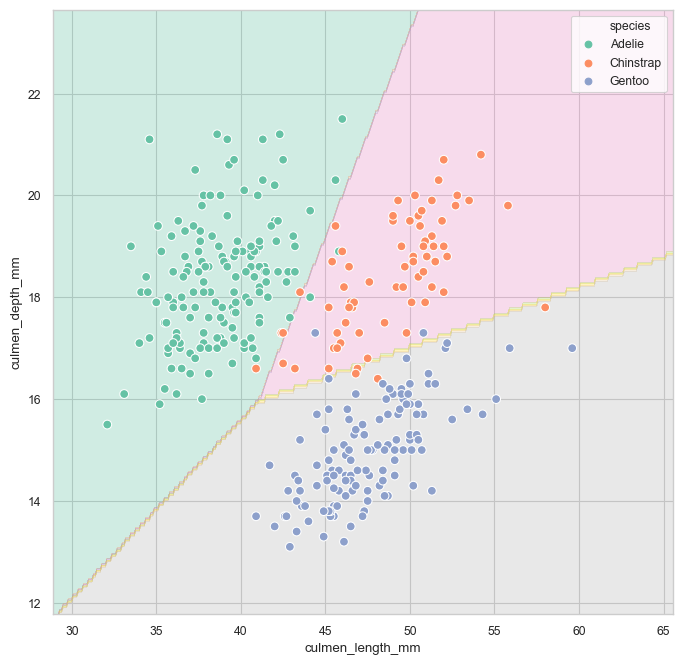

In [22]:
fig = plt.figure(figsize=(8, 8), dpi=100)
plt.contourf(x_, y_, predict_area.reshape(x_.shape), cmap='Set2', alpha=0.3)
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', data=predictor_data, hue='species', palette="Set2", s=40)
plt.axis([x_min, x_max, y_min, y_max])
plt.show()